# Data

This notebook illustrates the content of the datasets used in the joint Crab paper.   
The data are organized in the [folder data](data) according to their instrument of origin.

In [18]:
!ls -1 data

fact
fermi
hess
magic
other
README.md
veritas


## Events and IRFs
As explained in Section of 2 of the paper, the gamma-ray data stored in FITS format, consits of 
* Event Lists (containing events classified as photons)
* Instrument Response Functions (IRFs)   

The data, dubbed data level 3 (DL3) in jargon, are compliant with the specifications in the [Data formats for gamma-ray astronomy](https://gamma-astro-data-formats.readthedocs.io/en) forum.   
The novelty of this paper is the implementation of the open data format for all the IACT datasets, we will use the `DataStore` class of `gammapy` to examine one of them.

In [2]:
%matplotlib inline
from gammapy.data import DataStore

In [3]:
data_store = DataStore.from_dir("data/hess")
data_store.info()

Data store:
HDU index table:
BASE_DIR: data/hess
Rows: 20
OBS_ID: 23523 -- 23592
HDU_TYPE: ['aeff', 'edisp', 'events', 'gti', 'psf']
HDU_CLASS: ['aeff_2d', 'edisp_2d', 'events', 'gti', 'psf_table']

Observation table:
Observatory name: 'N/A'
Number of observations: 4


Given that IACT performances are dependent on the observing conditions, their datasets are released in chunks of 20-30 mins of stable data acquisition (DAQ), called observations (or runs). As we can see from the `info()` the H.E.S.S. dataset counts 4 observations (runs). Each dataset comes with an **observation table** providing technical informations about the observation: run identification number (`OBS_ID`), pointing position (equatorial (`RA_PNT`, `DEC_PNT`) and local (`ALT_PNT`, `AZ_PNT`) coordinates), total observation time (`ONTIME`), dead-time fraction due to the DAQ (`DEADC`), etc.

In [4]:
data_store.obs_table

OBS_ID,RA_PNT,DEC_PNT,GLON_PNT,GLAT_PNT,ZEN_PNT,ALT_PNT,AZ_PNT,OBJECT,RA_OBJ,DEC_OBJ,OFFSET_OBJ,ONTIME,LIVETIME,DEADC,TSTART,TSTOP,DATE-OBS,TIME-OBS,DATE-END,TIME-END,N_TELS,TELLIST,QUALITY,MUONEFF,EVENT_COUNT,TARGET_NAME,TARGET_TAG,TARGET_OFFSET,SAFE_ENERGY_LO,SAFE_ENERGY_HI
,deg,deg,deg,deg,deg,deg,deg,,deg,deg,deg,s,s,,s,s,,,,,,,,,,,,deg,TeV,TeV
int64,float32,float32,float32,float32,float32,float32,float32,bytes18,float32,float32,float32,float32,float32,float32,float64,float64,bytes10,bytes12,bytes10,bytes12,int64,bytes7,int64,float32,int64,bytes21,bytes14,float32,float32,float32
23523,83.63333,21.514444,184.9823,-6.0516925,48.61021,41.38979,22.481705,Crab Nebula,83.63333,22.014444,0.5,1687.0,1581.7368,0.9376033,123890826.0,123892513.0,2004-12-04,22:08:10.184,2004-12-04,22:36:17.184,4,"1,2,3,4",0,0.9070748,7613,Crab,crab,0.500049,0.8709636,100.0
23526,83.63333,22.514444,184.13332,-5.5163794,45.77929,44.22071,8.542603,Crab Nebula,83.63333,22.014444,0.5,1683.0,1572.6868,0.9344544,123893580.0,123895263.0,2004-12-04,22:54:04.184,2004-12-04,23:22:07.184,4,"1,2,3,4",0,0.9142412,7581,Crab,crab,0.49995112,0.70794576,100.0
23559,85.253334,22.014444,185.35727,-4.510869,45.368176,44.631824,2.2535799,Crab Nebula,83.63333,22.014444,1.5018803,1686.0,1578.1235,0.9360163,124067051.0,124068737.0,2004-12-06,23:05:15.184,2004-12-06,23:33:21.184,4,"1,2,3,4",0,0.91964024,7601,Crab,crab,1.5021166,0.66069347,100.0
23592,82.013336,22.014444,183.7408,-7.047852,48.389248,41.610752,21.7556,Crab Nebula,83.63333,22.014444,1.5018733,1686.0,1581.2646,0.9378794,124235636.0,124237322.0,2004-12-08,21:55:00.184,2004-12-08,22:23:06.184,4,"1,2,3,4",0,0.9120389,7334,Crab,crab,1.5016365,0.8709636,100.0


Beside the **observation table**, a **data unit table** lists the components of the DL3 files. Each of them has an `EVENTS` unit and a separate unit for each IRF component: effective area (`aeff`), energy dispersion (`edisp`), point spread function (`psf`). (Note the good time intervals (`gti`), are not currently used in gammapy). 

In [5]:
data_store.hdu_table

OBS_ID,HDU_TYPE,HDU_CLASS,FILE_DIR,FILE_NAME,HDU_NAME,SIZE
int64,bytes6,bytes9,bytes4,bytes34,bytes6,int64
23523,events,events,data,hess_dl3_dr1_obs_id_023523.fits.gz,events,285120
23523,gti,gti,data,hess_dl3_dr1_obs_id_023523.fits.gz,gti,5760
23523,aeff,aeff_2d,data,hess_dl3_dr1_obs_id_023523.fits.gz,aeff,11520
23523,edisp,edisp_2d,data,hess_dl3_dr1_obs_id_023523.fits.gz,edisp,377280
23523,psf,psf_table,data,hess_dl3_dr1_obs_id_023523.fits.gz,psf,118080
23526,events,events,data,hess_dl3_dr1_obs_id_023526.fits.gz,events,282240
23526,gti,gti,data,hess_dl3_dr1_obs_id_023526.fits.gz,gti,5760
23526,aeff,aeff_2d,data,hess_dl3_dr1_obs_id_023526.fits.gz,aeff,11520
23526,edisp,edisp_2d,data,hess_dl3_dr1_obs_id_023526.fits.gz,edisp,377280


Let's take a look, using `gammapy`, to the event lists and the IRFs

In [8]:
from gammapy.data import EventList
from gammapy.irf import EffectiveAreaTable2D
from gammapy.irf import EnergyDispersion2D
from gammapy.irf import PSF3D

**DL3 event lists** are simple table containing, for each event classified as a photon, its ID number given by the DAQ, its timestamp, its estimated position in the sky (RA, DEC) and its estimated energy.

In [9]:
dl3_file = "data/hess/data/hess_dl3_dr1_obs_id_023523.fits.gz"
events = EventList.read(dl3_file)
print(events.table[:4])

   EVENT_ID          TIME           RA       DEC      ENERGY  
                      s            deg       deg       TeV    
------------- ------------------ -------- --------- ----------
5407363825684 123890826.66805482 84.97964  23.89347  10.352011
5407363825695 123890826.69749284 84.54751 21.004095  4.0246882
5407363825831 123890827.23673964 85.39696  19.41868  2.2048872
5407363825970 123890827.79615426 81.93147  20.79867 0.69548655


The `peek()` function of the `EventList` class give us a broad overview grouping the photons according to the aforementioned quantites.

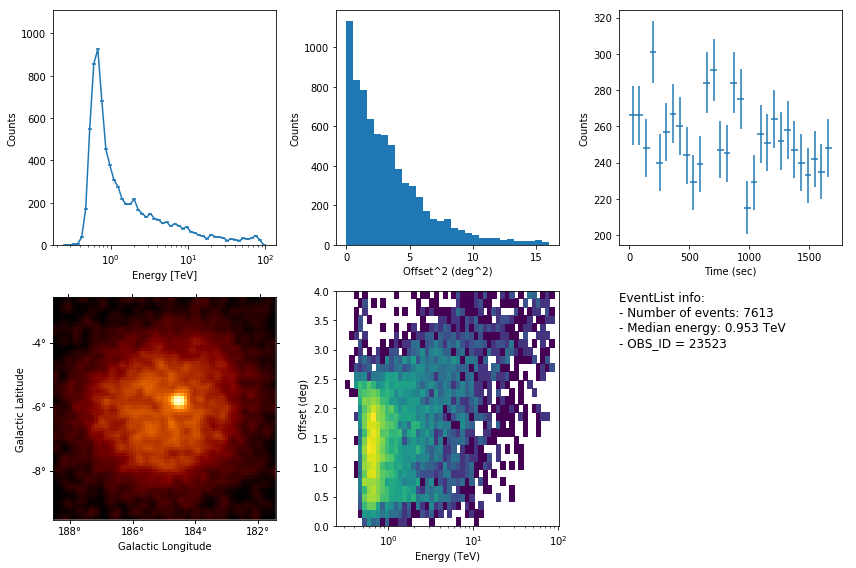

In [10]:
events.peek()

We can see in the top row, from left to right, the events histogrammed according to their energy, their offset (their squared distance in degree) from the pointing position, their time.   
In the bottom row we see on the left a raw countmap (a simple 2D histogram in sky coordinates) of the events arrival directions and on the right a 2D histogram of their energy and offset.     
Countsmap of the events can be produced with the command line option   
`python make.py maps`    
and are stored in [`results/maps`](./results/maps)

**DL3 IRFs** are generally functions of the energy and the offset from the camera center.    
The main components of an IACT IRFs are:   
* the **effective area**, representing the collection area of the instruments; 

/home/cosimo/software/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:461: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


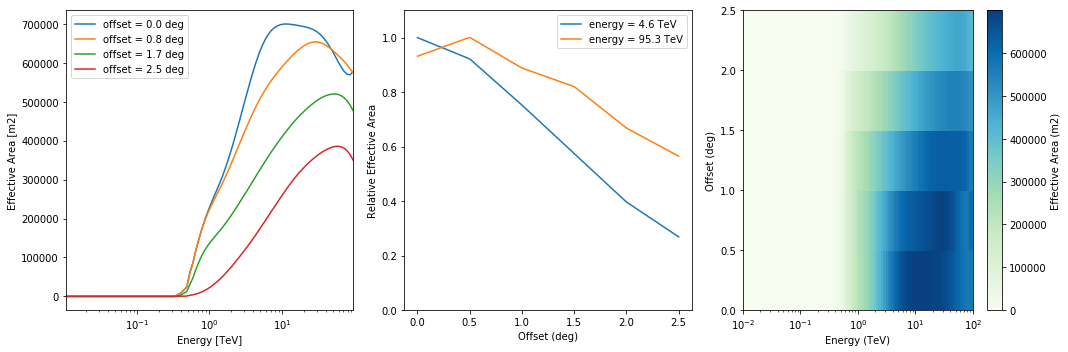

In [11]:
aeff = EffectiveAreaTable2D.read(dl3_file, hdu="aeff")
aeff.peek()

* the **energy dispersion**, i.e. the p.d.f. of the energy estimator;

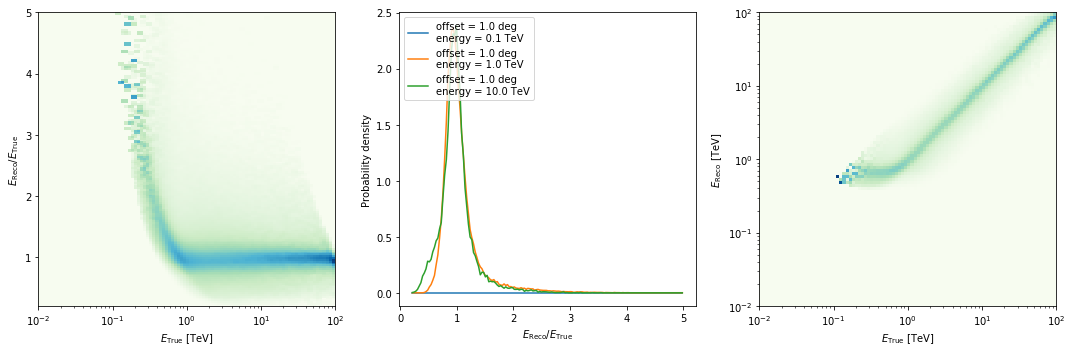

In [12]:
edisp = EnergyDispersion2D.read(dl3_file, hdu="edisp")
edisp.peek()

* the **point spread function** (psf), representing the spatial probability distribution of the estimated event
directions for a point source.   

If the IRFs are of point-like type, as for all the IACTs but H.E.S.S., they do not have a PSF component and their IRFs are functions of the energy only. 

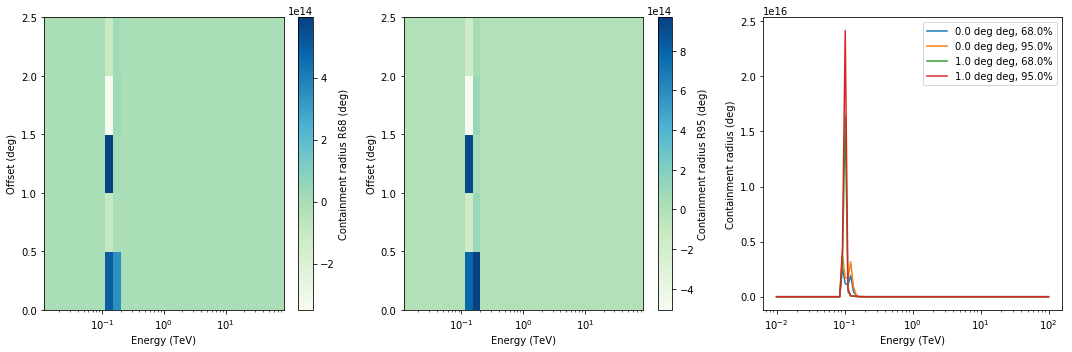

In [14]:
psf = PSF3D.read(dl3_file, hdu="psf")
psf.peek()

## Spectral data
Now it is necessary to separate the events in ON and OFF counts (binned in energy), that constitute the data of our likelihood. This is done using the ON and OFF regions method explained in Section 3.1. To run this process the command line interface can be used:   
`python make.py extract-spectra`   
An additional action performed at this stage is to interpolate at nodes, corresponding to the centers of the same energy bins of the counts, the IRFs. This is required in order to fold them with the assumed spectral model to predict the counts (see [Piron 2001](http://adsabs.harvard.edu/abs/2001A%26A...374..895P) for the mathematical details).          
The spectral data (ON and OFF counts and interpolated IRFs), are stored in the [ogip format](https://gamma-astro-data-formats.readthedocs.io/en/latest/spectra/ogip/index.html) in [`results/spectra`](./results/spectra).    
These quantities can constitute the input for a likelihood with any flux model, therefore releasing this quantities as a spectral measurement will allow future theoretical interpretaions with likelihood methods.    
The spectral data are handled by the `gammpy` class `SpectrumObservationList`. 

In [15]:
from gammapy.spectrum import SpectrumObservationList

In [16]:
spectrum_observations = SpectrumObservationList.read("results/spectra/veritas")
print(spectrum_observations)

SpectrumObservationList
Number of observations: 2


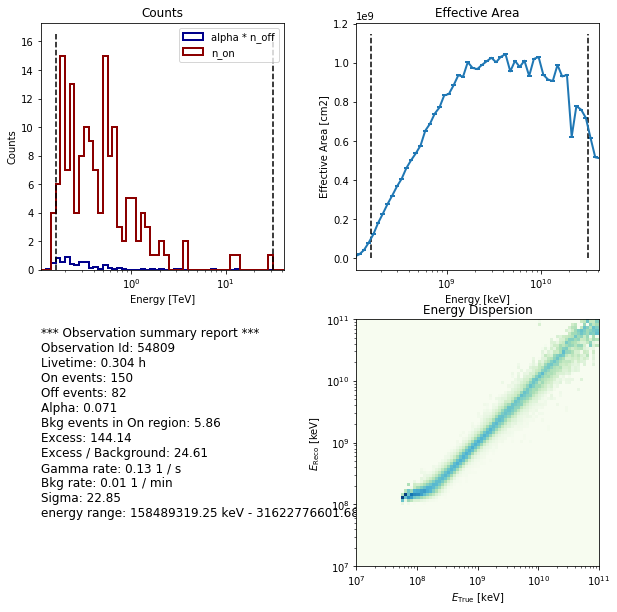

In [17]:
spectrum_observations[0].peek()

The `peek()` method offers a nice overview of the spectral data. In the top left corner we see the histogram of the ON and OFF counts, the latter scaled by the ratio of the ON to OFF total areas. The top right corner displays the effective area and the $E_{\rm min}$ and $E_{\rm max}$ energy range outside which the likelihood contribution has not to be calculated (cfr. Section 3.1). The bottom row shows on the left additional information on the observation and the energy dispersion on the right. 